# <center> <font color= #000047 size=6> Introducción al Aprendizaje Automático

## <center> <font color= #000047 size=5> Proyecto Final

# 2. Visualización, exploración, y análisis de datos:

### 2.1 Insigths de Resultados

**2.1.1 Declaramos las librerías a utilizar**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**2.1.2 Lectuta del Dataset**

In [2]:
# Lectura de los datos
df = pd.read_csv('tripadvisor_review.csv')
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


**2.1.3 Renombramos las columnas por las especificadas en el documento para mayor facilidad**

In [3]:
datos = df.rename(columns={
    "User ID": "User",
    "Category 1": "Art Galleries",
    "Category 2": "Dance Clubs",
    "Category 3": "Juice Bars",
    "Category 4": "Restaurants",
    "Category 5": "Museums",
    "Category 6": "Resorts",
    "Category 7": "Parks/picnic Spots",
    "Category 8": "Beaches",
    "Category 9": "Theaters",
    "Category 10": "Religious Institutions"
})
datos

,User,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/picnic Spots,Beaches,Theaters,Religious Institutions
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


**2.1.3.1 Obtenemos estadistica basica de cada una de las columnas**

In [4]:
stats = datos.iloc[:, 1:].describe()  # incluye todas las columnas (numéricas y categóricas)
print(stats)

       Art Galleries  Dance Clubs  Juice Bars  Restaurants     Museums  \
count     980.000000   980.000000  980.000000   980.000000  980.000000   
mean        0.893194     1.352612    1.013306     0.532500    0.939735   
std         0.326912     0.478280    0.788607     0.279731    0.437430   
min         0.340000     0.000000    0.130000     0.150000    0.060000   
25%         0.670000     1.080000    0.270000     0.410000    0.640000   
50%         0.830000     1.280000    0.820000     0.500000    0.900000   
75%         1.020000     1.560000    1.572500     0.580000    1.200000   
max         3.220000     3.640000    3.620000     3.440000    3.300000   

          Resorts  Parks/picnic Spots     Beaches    Theaters  \
count  980.000000          980.000000  980.000000  980.000000   
mean     1.842898            3.180939    2.835061    1.569439   
std      0.539538            0.007824    0.137505    0.364629   
min      0.140000            3.160000    2.420000    0.740000   
25%     

**2.1.4 Obtenemos el promedio de puntuación por categoría y graficamos de forma ascendente**

In [5]:
promedios = datos.drop(columns=["User"]).mean().sort_values(ascending=False)
print(promedios)

Parks/picnic Spots        3.180939
Beaches                   2.835061
Religious Institutions    2.799224
Resorts                   1.842898
Theaters                  1.569439
Dance Clubs               1.352612
Juice Bars                1.013306
Museums                   0.939735
Art Galleries             0.893194
Restaurants               0.532500
dtype: float64


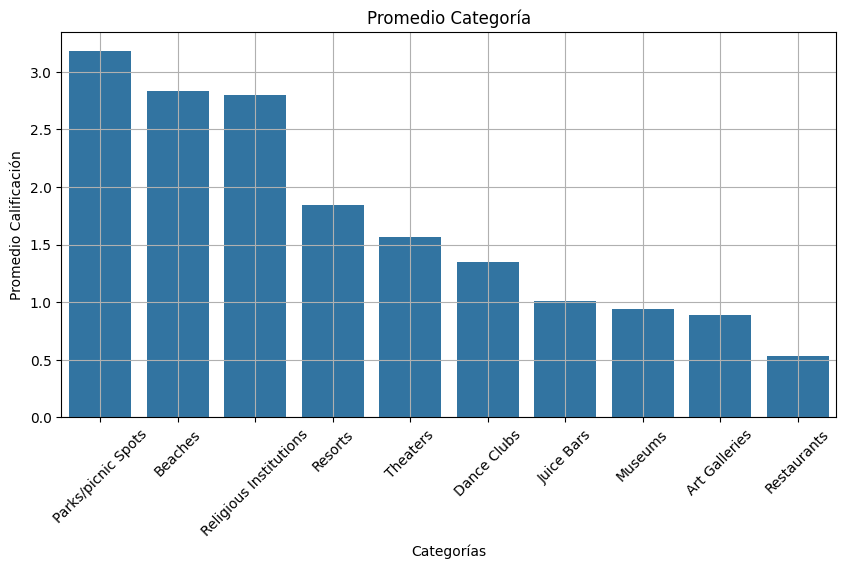

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(x=promedios.index, y=promedios.values)
plt.xticks(rotation=45)
plt.ylabel("Promedio Calificación")
plt.xlabel("Categorías")
plt.title("Promedio Categoría")
plt.grid()
plt.show()

**2.1.5 Calificaciones por categoría de forma distribuida**

Podemos observar en cada una de las gráficas cómo fue el comportamiento de las calificaciones por categoría.  Resaltando la calificación de los **Restaurantes** como el menor con votación promedio de **0.53** entre **Terrible y Malo** así como el de **Park/picnic Sports** como el mayor calificado con **3.18** entre **Muy Bueno y Excelente**

En las Gráficas siguientes se puede observar la distribución del comportamiento de votaciones.

<Figure size 1200x800 with 0 Axes>

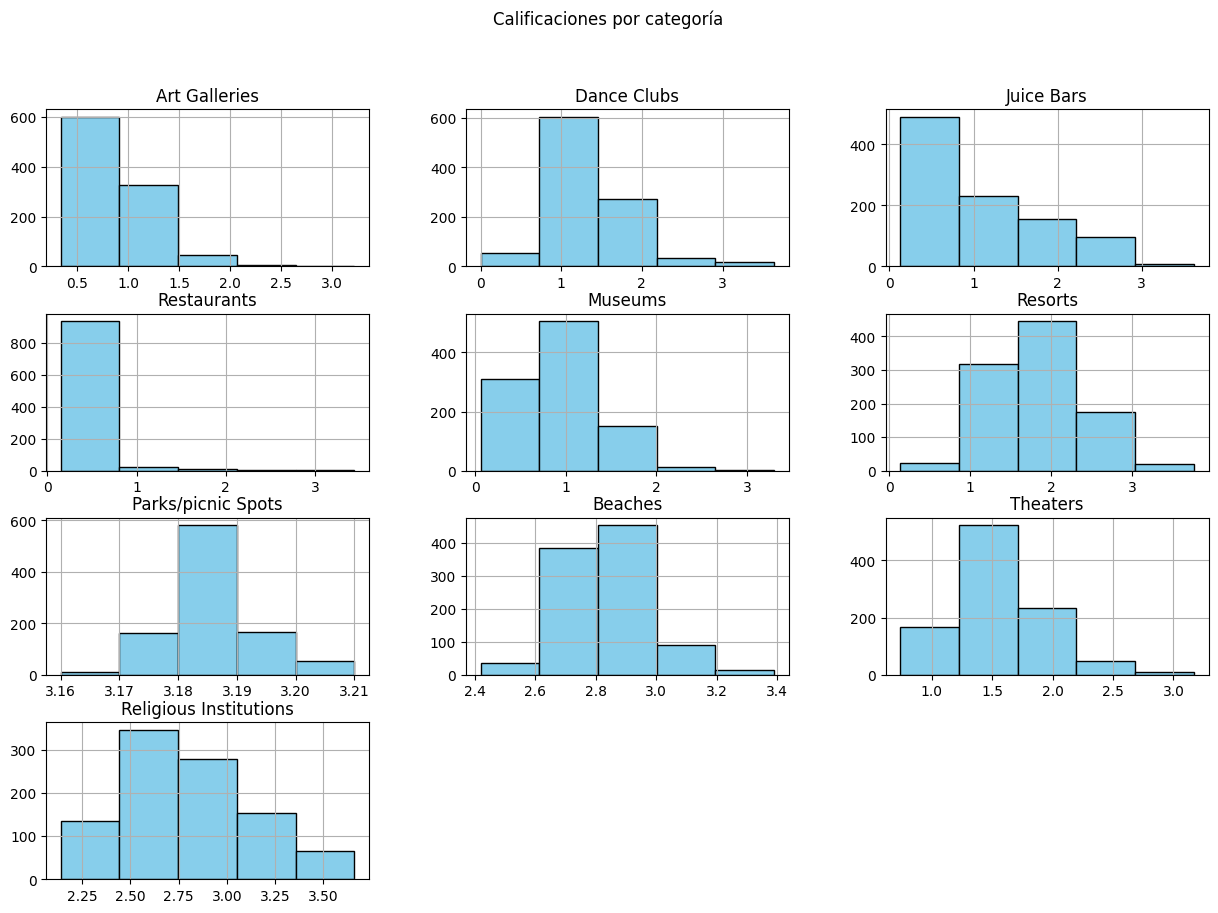

In [7]:
plt.figure(figsize=(12,8))
datos.drop(columns=["User"]).hist(bins=5, figsize=(15,10), color="skyblue", edgecolor="black")
plt.suptitle("Calificaciones por categoría")
plt.show()

**2.1.6 Identificación de similitudes entre categorías con Mapa de Calor**

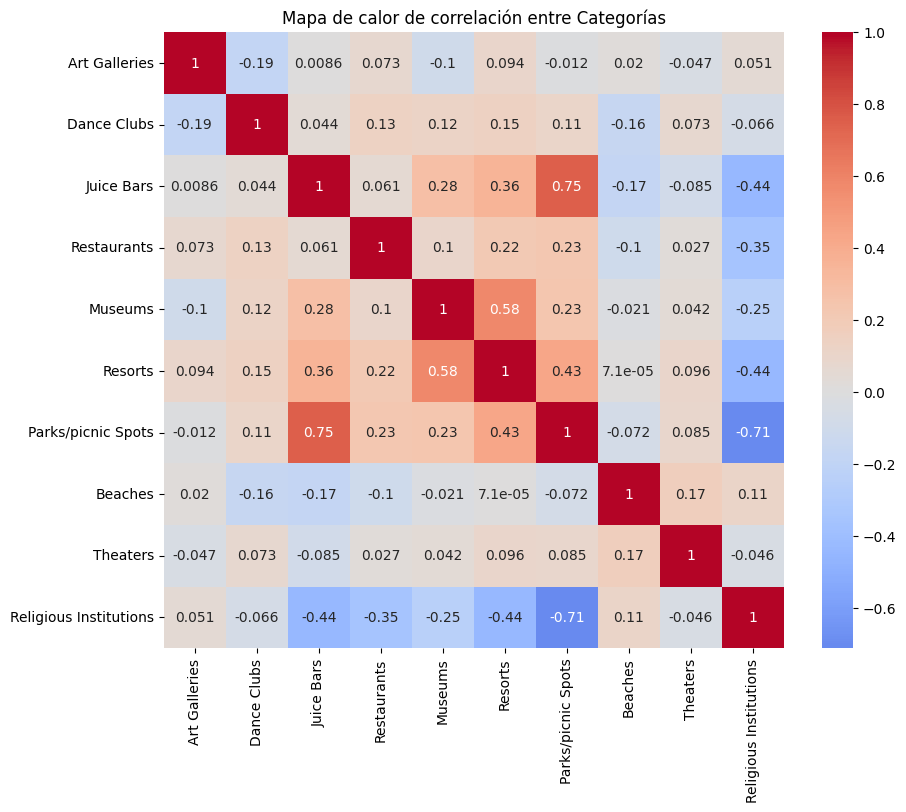

In [8]:
plt.figure(figsize=(10,8))
correlacion = datos.drop(columns=["User"]).corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlación entre Categorías")
plt.show()

***Nota:*** Podemos observar que a los que les gustan los **Parks/picnics Spots** tambien les gustan las **barras de jugos**.

**2.1.7 El Top 10 de los Usuarios con calificaciones más altas en promedio para todas las categorías**

In [9]:
datos['CalifPromedio_User'] = datos.drop(columns=['User']).mean(axis=1)
top_users = datos[['User','CalifPromedio_User']].sort_values(by='CalifPromedio_User', ascending=False)
top_users.head(10)

,User,CalifPromedio_User
247,User 248,2.225
666,User 667,2.225
536,User 537,2.155
795,User 796,2.130
812,User 813,2.119
1,User 2,2.114
915,User 916,2.105
671,User 672,2.097
483,User 484,2.090
307,User 308,2.081


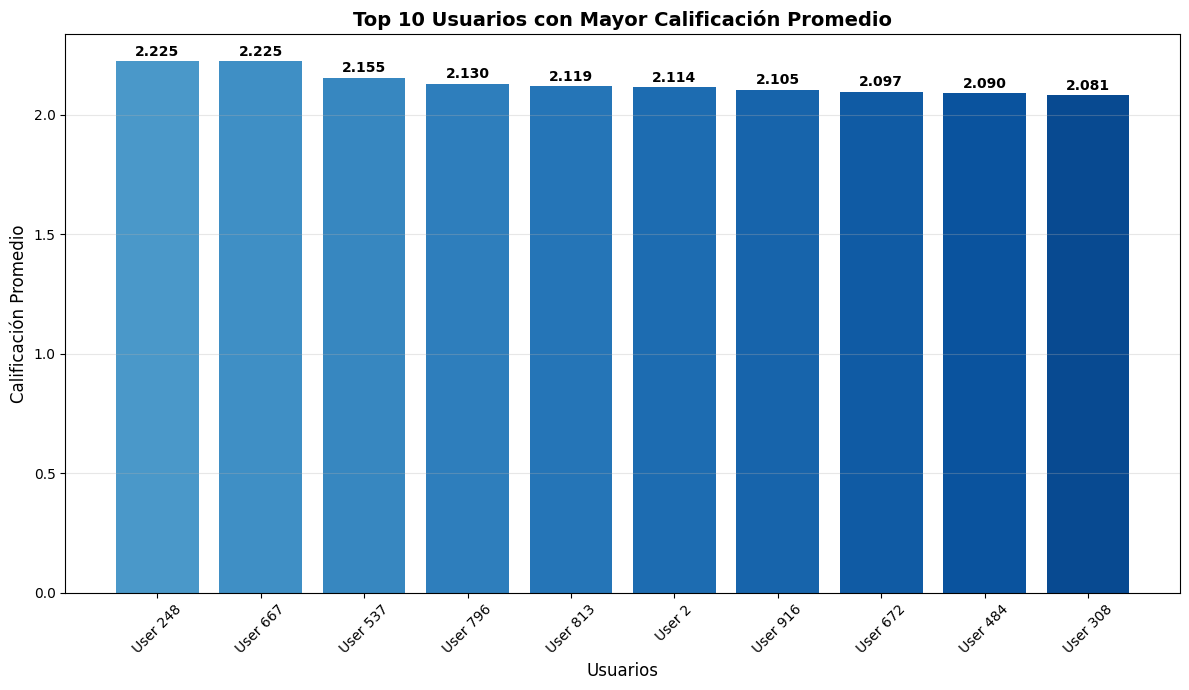

In [10]:
top_10 = top_users.head(10)

plt.figure(figsize=(12, 7))
colors = plt.cm.Blues(np.linspace(0.6, 0.9, 10))

bars = plt.bar(top_10['User'].head(10), top_10['CalifPromedio_User'].head(10), color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Usuarios', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.title('Top 10 Usuarios con Mayor Calificación Promedio', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


***Nota:*** Podemos observar que los usuarios **667** y **248** son los que calificaron más alto en promedio en todas las categorías, con un promedio de **2.225**

**2.1.8 El Top 10 de los Usuarios con calificaciones más bajas en promedio para todas las categorías**

In [11]:
datos['CalifPromedio_User'] = datos.drop(columns=['User']).mean(axis=1)
top_users = datos[['User','CalifPromedio_User']].sort_values(by='CalifPromedio_User', ascending=True)
top_users.head(10)

,User,CalifPromedio_User
978,User 979,1.213
384,User 385,1.305
323,User 324,1.341
541,User 542,1.383
189,User 190,1.389
457,User 458,1.396
87,User 88,1.396
239,User 240,1.401
278,User 279,1.401
91,User 92,1.404


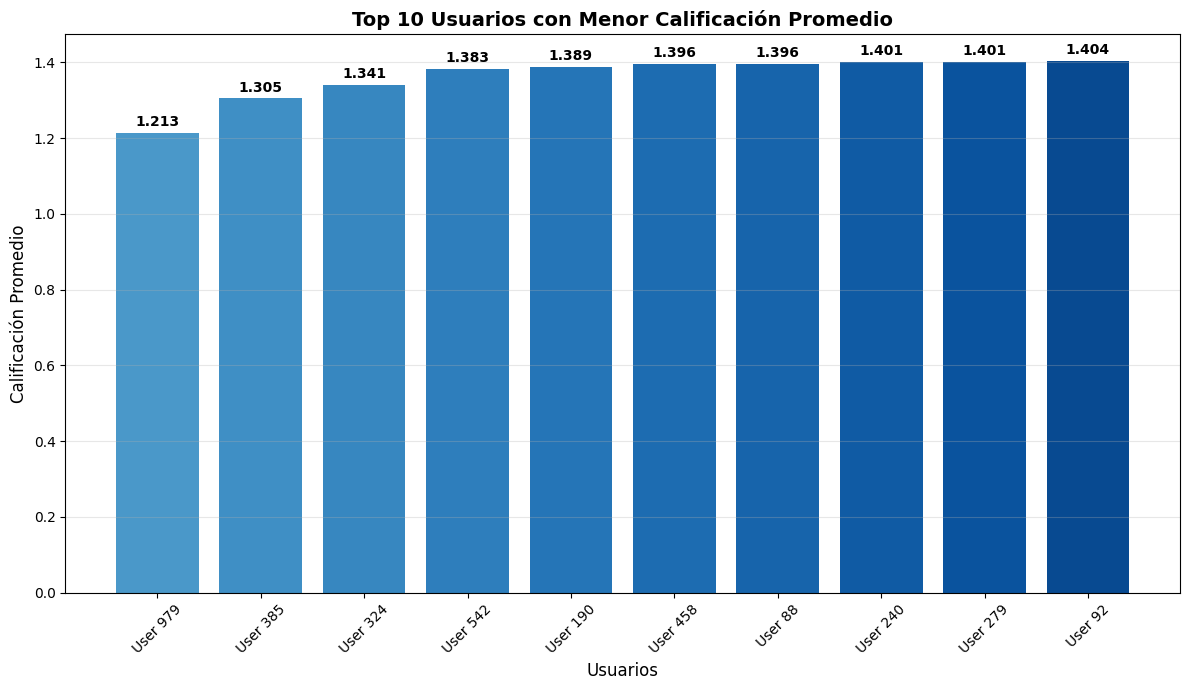

In [12]:
top_10 = top_users.head(10)

plt.figure(figsize=(12, 7))
colors = plt.cm.Blues(np.linspace(0.6, 0.9, 10))

bars = plt.bar(top_10['User'].head(10), top_10['CalifPromedio_User'].head(10), color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Usuarios', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.title('Top 10 Usuarios con Menor Calificación Promedio', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

***Nota:*** Podemos observar que los usuarios **979** y **385** son los que calificaron más bajo en promedio en todas las categorías, con un promedio de **1.213 y 1.305**

# 3. Clusterización de los datos 


### 3.1 Mediante los criterios del codo y del gradiente obtenga el número de grupos optimos para realizar una clusterización por clustering jerárquico.

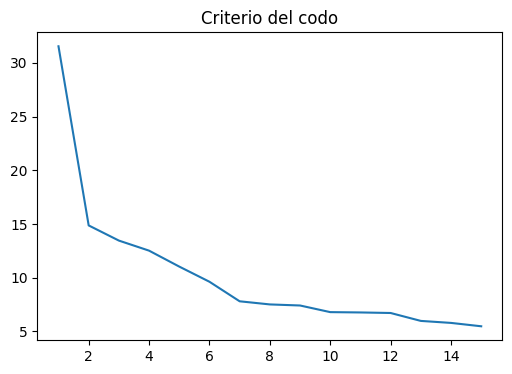

In [13]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

XDf = df.iloc[:, 1:] 
X=np.array(XDf)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
z = hierarchy.linkage(X, metric='euclidean', method='ward')

last = z[-15:, 2]
last_rev = last[::-1]
inds = np.arange(1, len(last_rev)+1)
plt.figure(figsize=(6,4))
plt.title("Criterio del codo")
plt.plot(inds, last_rev)
plt.show()

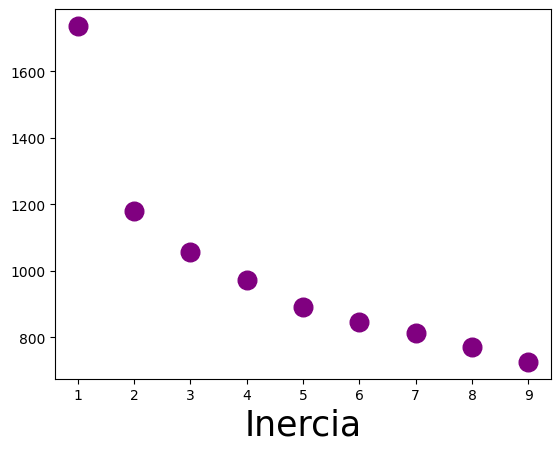

In [14]:
inercias =[]
for k in range(1,10):
    kmeans =KMeans(n_clusters=k).fit(X)
    inercias.append(kmeans.inertia_)

plt.Figure(figsize=(6,5), dpi=100)
plt.scatter(range(1,10), inercias, marker="o", s=180,color= "purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.xlabel("Inercia", fontsize=25)
plt.show()

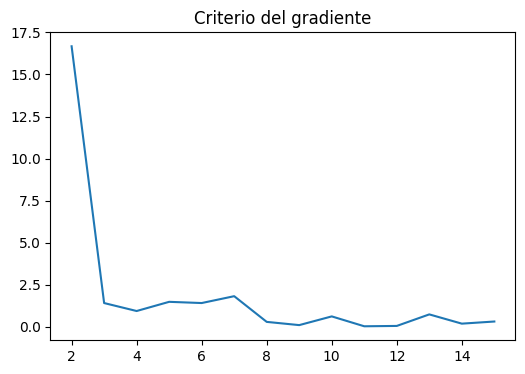

In [15]:
gradiente = np.diff(last)
grad_rev = gradiente[::-1]
plt.figure(figsize=(6,4))
plt.title("Criterio del gradiente")
plt.plot(inds[1:], grad_rev)
plt.show()

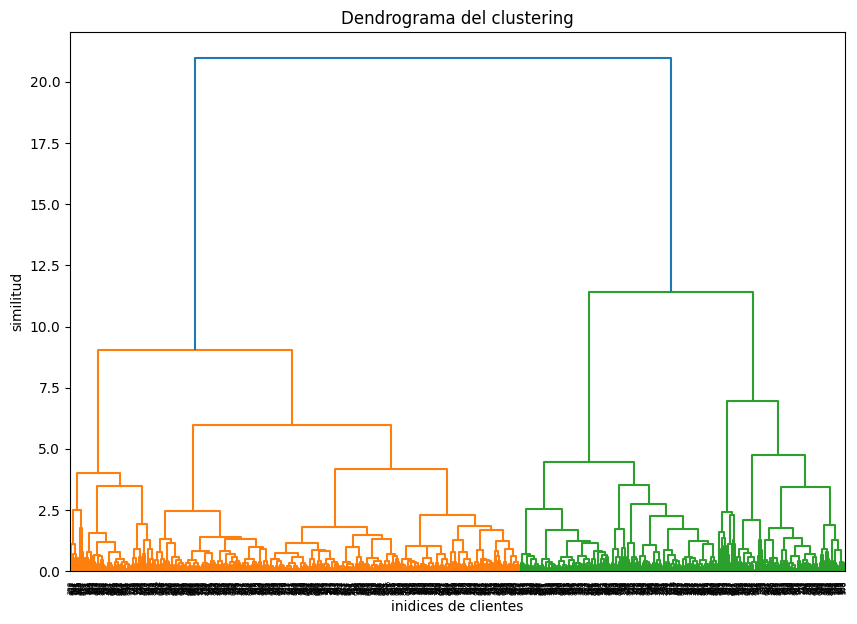

In [16]:
mat_similitud = cosine_similarity(datos.iloc[:, 1:].values)
z = hierarchy.linkage(mat_similitud, metric='euclidean', method='ward')
plt.figure(figsize=(10,7))
plt.xlabel('inidices de clientes')
plt.ylabel('similitud')
plt.title('Dendrograma del clustering')
dnd=hierarchy.dendrogram(z)


### 3.2 Mediante los criterios del codo y del gradiente obtenga el número de grupos optimos para realizar una clusterización por Kmeans.

Según la grafica del codo y gradiente del ejemplo anterior podemos definir que 7 es un buen número de grupos para la clusterización

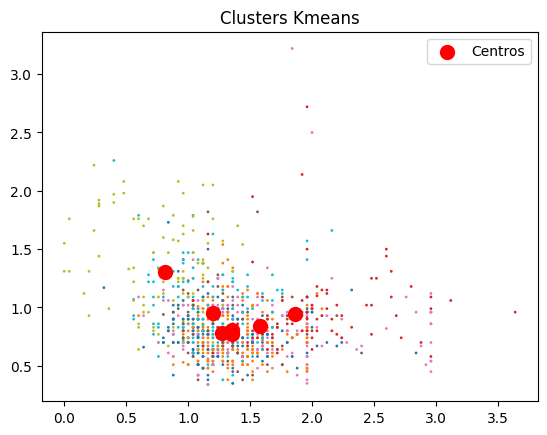

In [17]:
X=datos.iloc[:, 1:].values
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
labels = kmeans.labels_
centros = kmeans.cluster_centers_
plt.scatter(X[:,1], X[:,0], c=labels, cmap="tab10", s=1) 
plt.scatter(centros[:,1], centros[:,0], c="red", marker="o", s=100, label="Centros")
plt.legend()
plt.title("Clusters Kmeans")
plt.show()